In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os

from pathlib import Path
# from glob import glob

from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
by_merge_map = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T', 30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z', 36:'a', 37:'b', 38:'d', 39:'e', 40:'f', 41:'g', 42:'h', 43:'n', 44:'q', 45:'r', 46:'t'}
by_merge_map_new = {}
poplist = []

for k in by_merge_map.keys():
    if k >= 10 and k <= 35:
        by_merge_map_new[k-10] = by_merge_map[k]
        
root_path, data_path = get_root_path('mnist_portfolio')

paths = data_path.glob('*.csv')

In [4]:
lower = 10
upper = 35

for p in paths:
    if 'Rensade' in str(p):
        x_train, y_train = gen_sets(p)
x_train[x_train < 150] = 0
y_train = y_train - 10

In [5]:
pic_no = 1
def fix_image(image, plot=False):
    pic = trim_img(image)
    
    return square_pick(pic, plot)


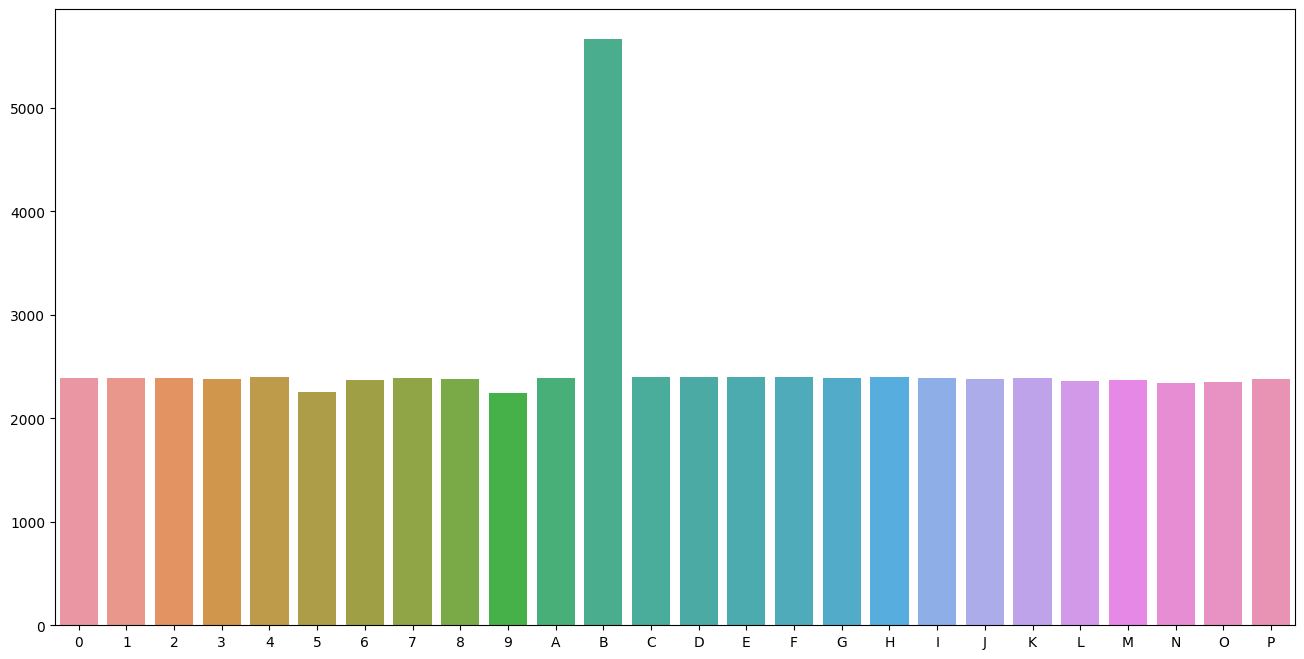

In [6]:
# Show distributions
plt.figure(figsize=(16, 8)) 
# plt.subplot(1,2,1)
unique_bar(y_train, by_merge_map)

In [7]:
# no = 0
# last = len(x_train)
# for i, x in enumerate(x_train):
#     print(f'{i}/{last}')
#     if no == 0:
#         x_train2 = fix_image(x)
#         np.expand_dims(x_train2,axis=-1)
#         no += 1
        
#     else:
#         # print(len(x))
        
#         # x_train2 = np.append(x_train2, fix_image(x), axis=1)
#         x_train2 = np.vstack([x_train2, fix_image(x)])
#         no += 1
#     # if no == 5: break
# x_train = x_train2.reshape(no, 28,28)

Print 10 random pictures

In [8]:
no = 0
last = len(x_train)
for i, x in enumerate(x_train):
    if i%100 == 0:print(f'{i}/{last}')

    x_train[i]= fix_image(x_train[i]).reshape(28,28)
    
    
    # if no == 5: break
# x_train = x_train2.reshape(no, 28,28)

0/65017
100/65017
200/65017
300/65017
400/65017
500/65017
600/65017
700/65017
800/65017
900/65017
1000/65017
1100/65017
1200/65017
1300/65017
1400/65017
1500/65017
1600/65017
1700/65017
1800/65017
1900/65017
2000/65017
2100/65017
2200/65017
2300/65017
2400/65017
2500/65017
2600/65017
2700/65017
2800/65017
2900/65017
3000/65017
3100/65017
3200/65017
3300/65017
3400/65017
3500/65017
3600/65017
3700/65017
3800/65017
3900/65017
4000/65017
4100/65017
4200/65017
4300/65017
4400/65017
4500/65017
4600/65017
4700/65017
4800/65017
4900/65017
5000/65017
5100/65017
5200/65017
5300/65017
5400/65017
5500/65017
5600/65017
5700/65017
5800/65017
5900/65017
6000/65017
6100/65017
6200/65017
6300/65017
6400/65017
6500/65017
6600/65017
6700/65017
6800/65017
6900/65017
7000/65017
7100/65017
7200/65017
7300/65017
7400/65017
7500/65017
7600/65017
7700/65017
7800/65017
7900/65017
8000/65017
8100/65017
8200/65017
8300/65017
8400/65017
8500/65017
8600/65017
8700/65017
8800/65017
8900/65017
9000/65017
9100/65017


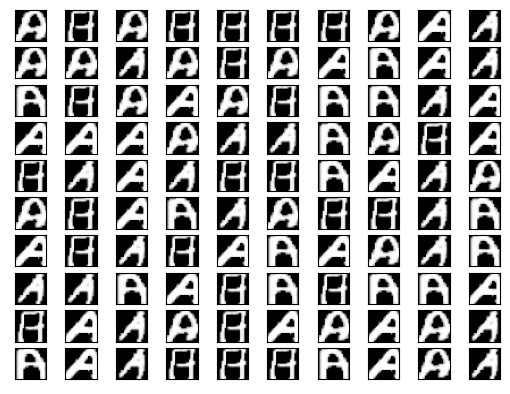

In [ ]:
for i, r in enumerate(np.random.randint(0, len(x_train2), 100)):
    
    plt.subplot(10,10,i+1)
    plt.imshow(x_train2[r], cmap='gray')
    plt.xticks([]), plt.yticks([])

The mean picture of the training set

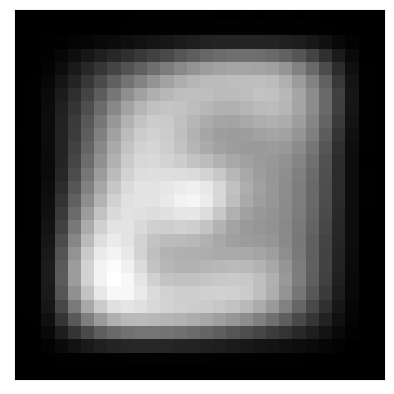

In [ ]:
plt.xticks([]), plt.yticks([])
plt.imshow(np.mean(x_train, axis=0), cmap='gray')

### Modeling


Restore to oneliner

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.python.keras import layers
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [ ]:
x_train = np.asarray(x_train.reshape(65017, 28, 28))

In [ ]:
num_classes = len(np.unique(y_train))
input_shape = (28, 28, 1)

# x_train = x_train
x_train = x_train.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)

y_train = keras.utils.to_categorical(y_train.ravel(), num_classes)

In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_test, y_train1, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=215)

In [ ]:
# Building model

model=keras.Sequential(

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
[
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
        
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
        
    tf.keras.layers.Dense(num_classes,activation="softmax")
    ])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [ ]:
model.save('./save_test/st.h5')

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(x_train, y_train, batch_size=128)
test_gen = datagen.flow(x_test, y_test, batch_size=128)

In [ ]:
epochs = 100
batch_size = 128
train_steps = x_train.shape[0] // batch_size
valid_steps = x_test.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [ ]:
history = model.fit(train_gen, 
                    epochs = epochs, 
                    steps_per_epoch = train_steps,
                    validation_data = test_gen,
                    validation_steps = valid_steps, 
                    callbacks=[es, rp])

Epoch 1/100
507/507 [==============================] - 96s 187ms/step - loss: 0.3262 - accuracy: 0.9058 - val_loss: 0.4794 - val_accuracy: 0.8575 - lr: 0.0010
Epoch 2/100
507/507 [==============================] - 97s 192ms/step - loss: 0.1474 - accuracy: 0.9570 - val_loss: 0.1831 - val_accuracy: 0.9472 - lr: 0.0010
Epoch 3/100
507/507 [==============================] - 97s 190ms/step - loss: 0.1253 - accuracy: 0.9631 - val_loss: 0.1283 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 4/100
507/507 [==============================] - 98s 194ms/step - loss: 0.1113 - accuracy: 0.9674 - val_loss: 0.1031 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 5/100
507/507 [==============================] - 95s 187ms/step - loss: 0.0979 - accuracy: 0.9705 - val_loss: 0.1186 - val_accuracy: 0.9642 - lr: 0.0010
Epoch 6/100
507/507 [==============================] - 94s 186ms/step - loss: 0.0940 - accuracy: 0.9722 - val_loss: 0.0796 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 7/100
507/507 [=========================

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.014132512733340263
Test accuracy: 0.9959243535995483


In [ ]:
import datetime

save_time = str(datetime.datetime.now()).rsplit('.')[0].replace('-', '_').replace(' ', '_')
model.save(f'./model/emnist_save{save_time}.json')

NameError: name 'model' is not defined

In [ ]:
m2 = keras.models.load_model('./model/emnist_save.json')
m2.evaluate(x_test, y_test, verbose=0)

[0.01413253229111433, 0.9959243535995483]

In [ ]:
y_pred = m2.predict(x_test)

407/407 [==============================] - 6s 13ms/step


<AxesSubplot: >

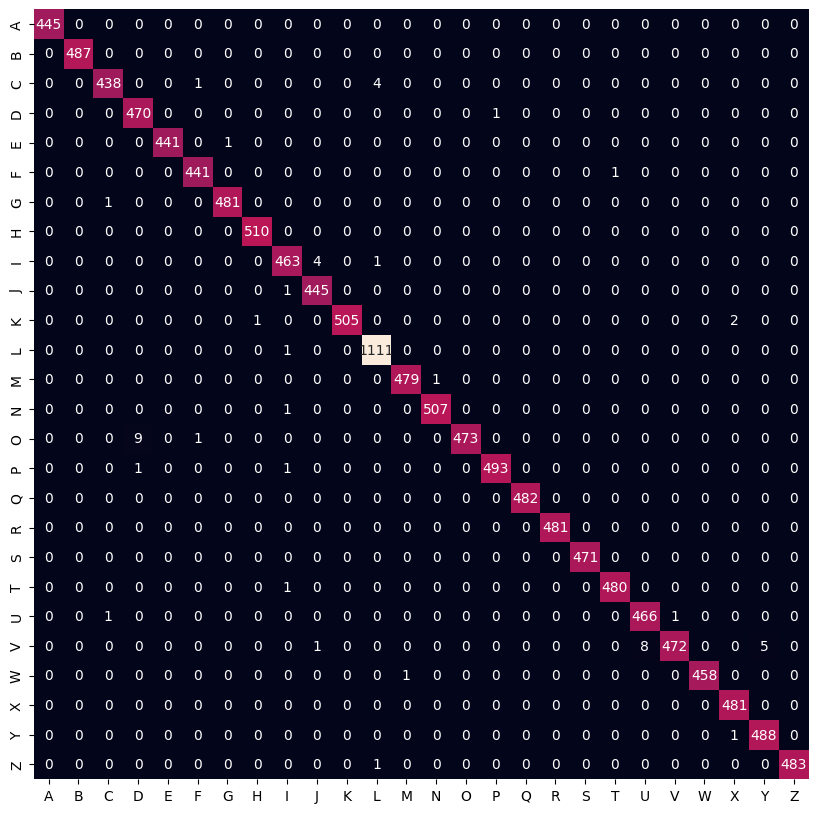

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cm, vmin=np.min(cm), vmax=np.max(cm), annot=True, cbar=False ,fmt='d', xticklabels=by_merge_map_new.values(), yticklabels=by_merge_map_new.values())

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),target_names=by_merge_map_new.values()))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       445
           B       1.00      1.00      1.00       487
           C       1.00      0.99      0.99       443
           D       0.98      1.00      0.99       471
           E       1.00      1.00      1.00       442
           F       1.00      1.00      1.00       442
           G       1.00      1.00      1.00       482
           H       1.00      1.00      1.00       510
           I       0.99      0.99      0.99       468
           J       0.99      1.00      0.99       446
           K       1.00      0.99      1.00       508
           L       0.99      1.00      1.00      1112
           M       1.00      1.00      1.00       480
           N       1.00      1.00      1.00       508
           O       1.00      0.98      0.99       483
           P       1.00      1.00      1.00       495
           Q       1.00      1.00      1.00       482
           R       1.00    